In [3756]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

In [3757]:


df_diabetics = pd.read_csv('diabetes2.csv')

In [3758]:
df_diabetics.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3759]:

df_diabetics.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [3760]:
df_diabetics.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [3761]:
df_diabetics.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [3762]:


df_is_diabetic = df_diabetics[df_diabetics.Outcome == 1]

df_is_diabetic

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [3763]:
df_isnt_diabetic = df_diabetics[df_diabetics.Outcome == 0]

df_isnt_diabetic

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [3764]:


df_isnt_diabetic = df_isnt_diabetic.sample(n=268)

df_isnt_diabetic

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
600,1,108,88,19,0,27.1,0.400,24,0
721,1,114,66,36,200,38.1,0.289,21,0
290,0,78,88,29,40,36.9,0.434,21,0
174,2,75,64,24,55,29.7,0.370,33,0
94,2,142,82,18,64,24.7,0.761,21,0
...,...,...,...,...,...,...,...,...,...
234,3,74,68,28,45,29.7,0.293,23,0
544,1,88,78,29,76,32.0,0.365,29,0
320,4,129,60,12,231,27.5,0.527,31,0
643,4,90,0,0,0,28.0,0.610,31,0


In [3765]:


df = pd.concat([df_isnt_diabetic, df_is_diabetic], axis = 0)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
600,1,108,88,19,0,27.1,0.400,24,0
721,1,114,66,36,200,38.1,0.289,21,0
290,0,78,88,29,40,36.9,0.434,21,0
174,2,75,64,24,55,29.7,0.370,33,0
94,2,142,82,18,64,24.7,0.761,21,0
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [3766]:


df.reset_index(inplace = True)
df

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,600,1,108,88,19,0,27.1,0.400,24,0
1,721,1,114,66,36,200,38.1,0.289,21,0
2,290,0,78,88,29,40,36.9,0.434,21,0
3,174,2,75,64,24,55,29.7,0.370,33,0
4,94,2,142,82,18,64,24.7,0.761,21,0
...,...,...,...,...,...,...,...,...,...,...
531,755,1,128,88,39,110,36.5,1.057,37,1
532,757,0,123,72,0,0,36.3,0.258,52,1
533,759,6,190,92,0,0,35.5,0.278,66,1
534,761,9,170,74,31,0,44.0,0.403,43,1


In [3767]:


df_val_nt_diabetic = df.head(5)
df_val_nt_diabetic


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,600,1,108,88,19,0,27.1,0.400,24,0
1,721,1,114,66,36,200,38.1,0.289,21,0
2,290,0,78,88,29,40,36.9,0.434,21,0
3,174,2,75,64,24,55,29.7,0.370,33,0
4,94,2,142,82,18,64,24.7,0.761,21,0


In [3768]:
df_val_is_diabetic = df.tail(5)
df_val_is_diabetic

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
531,755,1,128,88,39,110,36.5,1.057,37,1
532,757,0,123,72,0,0,36.3,0.258,52,1
533,759,6,190,92,0,0,35.5,0.278,66,1
534,761,9,170,74,31,0,44.0,0.403,43,1
535,766,1,126,60,0,0,30.1,0.349,47,1


In [3769]:

df = df.iloc[5:]


df = df[:-5]

df

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
5,627,0,132,78,0,0,32.4,0.393,21,0
6,41,7,133,84,0,0,40.2,0.696,37,0
7,492,4,99,68,38,0,32.8,0.145,33,0
8,299,8,112,72,0,0,23.6,0.840,58,0
9,59,0,105,64,41,142,41.5,0.173,22,0
...,...,...,...,...,...,...,...,...,...,...
526,748,3,187,70,22,200,36.4,0.408,36,1
527,749,6,162,62,0,0,24.3,0.178,50,1
528,750,4,136,70,0,0,31.2,1.182,22,1
529,753,0,181,88,44,510,43.3,0.222,26,1


In [3770]:


df_val_total = pd.concat([df_isnt_diabetic, df_is_diabetic])

df_val_total.reset_index(inplace = True)

df_val_total_real = df_val_total.Outcome
df_val_total = df_val_total.drop(['index','Outcome'], axis =1)

df_val_total


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,108,88,19,0,27.1,0.400,24
1,1,114,66,36,200,38.1,0.289,21
2,0,78,88,29,40,36.9,0.434,21
3,2,75,64,24,55,29.7,0.370,33
4,2,142,82,18,64,24.7,0.761,21
...,...,...,...,...,...,...,...,...
531,1,128,88,39,110,36.5,1.057,37
532,0,123,72,0,0,36.3,0.258,52
533,6,190,92,0,0,35.5,0.278,66
534,9,170,74,31,0,44.0,0.403,43


In [3771]:
df.Outcome.value_counts()

Outcome
0    263
1    263
Name: count, dtype: int64

In [3772]:


X = df.drop(['index', 'Outcome'], axis = 1)
Y = df['Outcome']

In [3773]:


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42, stratify = Y)


In [3774]:

lr = LogisticRegression(max_iter=2000)

lr.fit(X_train, Y_train)
pred = lr.predict(X_test)

In [3775]:
# Print the model accuracy
accuracy = accuracy_score(Y_test, pred)
print(f'Model Accuracy: {accuracy:.2f}')

Model Accuracy: 0.76


In [3776]:
cm = confusion_matrix(Y_test, pred)

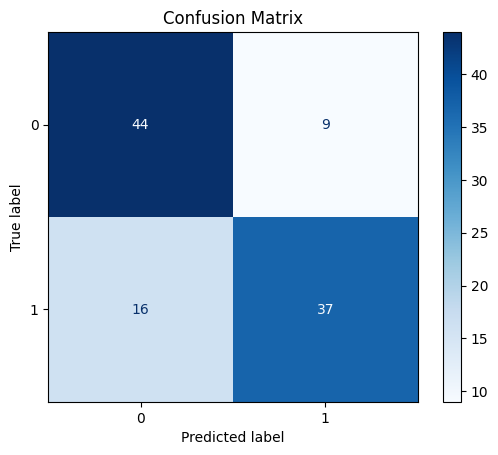

In [3777]:
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()